In [ ]:
pip install lxml beautifulsoup4 html5lib  

In [ ]:
import pandas as pd
import lxml
import requests
from bs4 import BeautifulSoup 


### Web Scapping with Python


To get the information you want manually from a web page, can take a lot of time. This is especially true if you need large amounts of data from websites that are regularly updated with new content. 

Automated web scraping can help save you much time and agony. 

There are however some legal aspects of web scraping to be aware of. Some websites explicitly allow web scraping. Others explicitly forbid it. Many websites don’t offer any clear guidance one way or the other.

Before scraping any website, check for a terms and conditions page to see if there are explicit rules about scraping. For general information check Legal Perspectives on Scraping Data From The Modern Web. Web scaraping of a site  may cause your IP to be blocked permanently by a website.

Web scrapping has challenges as web technologies keep evolving and combine different technologies. 

There are some general structures that tend to repeat, but essentially each website is unique and needs its own individual treatment to get the  information you want.  
So generalizing a web scrapping apporach across websites is often not possible.


If a site’s structure changes, a scraper that worked one day may not work at a later date or may not find the relevant information.

Many website providers offer Application Programming Interfaces (APIs) that allow you to access their data in a predefined manner. 

With APIs, you can avoid parsing HTML and instead access the data directly using formats like JSON and XML.

With an API, the process is generally more stable than gathering the data through web scraping. 



### Inspect Your Data Source
The first step is to go to the site you want to scrape using your favorite browser. You first want to get a sense of the site structure in order to extract the information you’re interested in.



To investigate the page structure to assess what you want from the HTML start by right-clicking the element you want to scrape and then hitting “Inspect element”

Clciking Inspect Element zooms to element location in the document object model (DOM). You can also hover over the HTML text and the corresponding elements should light up on the page.


U.S. Soccer website: https://www.ussoccer.com/uswnt-stats.

Go to the website, right click on the data, and select Inspect.

 You will see the HTML behind the page, among other things. Look for the HTML tags 
 
         '<table>, <tbody>, <tr>, or <td>.'
   


These all signify you have found a table.
     

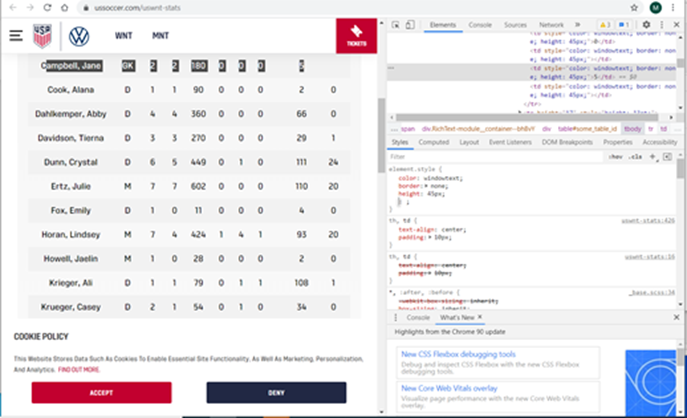

Tables are created by nesting a variety of elements between table tags. Tables are organized into rows, not columns, by the table row (tr) element. Each table row is made up of one or more table data (td) entries. Columns are formed automatically when table data elements from each subsequent table row automatically line up in vertical columns.



Pandas is able to read HTML tables into a ``list`` of ``DataFrame`` objects.

General structure of html tables

    <table>
    <tr>
        <td>Mood</td>
        <td>Color</td>
        <td>Weather</td>
    </tr>
    <tr>
        <td>Happy</td>
        <td>Yellow</td>
        <td>Sunny</td>
    </tr>
    <tr>
        <td>Sleepy</td>
        <td>Gray</td>
        <td>Cloudy</td>
    </tr>
    </table>



In [ ]:
list_of_dfs = pd.read_html('https://www.ussoccer.com/uswnt-stats')

This code performs an HTTP request to the given URL. It retrieves the HTML data that the server sends back and stores that data in a Python object.

In [ ]:
type(list_of_dfs)

In [ ]:
len(list_of_dfs)

In [ ]:
list_of_dfs[0]

In [ ]:
list_of_dfs[1]

We can read the html tables to include the header by including header=0, and adding an index index_col=0.

The header parameter specifies a row number to be the column labels

In [ ]:
nicedfs = pd.read_html('https://www.ussoccer.com/uswnt-stats', header=0, index_col=0)
nicedfs[0].head(2)

### More complicated web scraping:

Scraping data from the Web using Python, requests, and Beautiful Soup. 

Basic Steps:
-  Request the content (source code) of a specific URL from the server
-  Download the content that is returned
-  Identify the elements of the page that you want to extract
-  Extract and (if necessary) reformat those elements for analysis or use in whatever way we require.

Send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. 

For this task, use the third-party HTTP library for python called requests.

The requests library makes a GET request to a web server, which will download the HTML contents of a given web page. 

Several different types of requests can be made using requests, GET is just one. 

From a request we get a Response object. This object has a status_code property, which indicates if the page was downloaded successfully.



In [ ]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page

Once we have accessed the HTML content, we we then need to parse the data. Since most of the HTML data is nested, we cannot extract data simply through string processing. 

We need a parser which can create a nested/tree structure of the HTML data. There are many HTML parser libraries available but the most advanced one is html5lib.

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It allows you to navigate and search the parse tree i.e. do tree traversal.

You can specify different parsers (lxml and html5lib) to support navigating, searching, and modifying the parse tree.

### Parse HTML Code With Beautiful Soup


Beautiful Soup allows you to interact with HTML in a similar way to how you would interact with a web page using developer tools. 


A Beautiful Soup object takes the HTML content you scrape as its input. When you instantiate the object, you also instruct Beautiful Soup to use the appropriate parser.

The resulting soup object contains all the data in the nested structure so it can be programmatically extracted. 



In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

We can now print out the HTML content of the page, formatted nicely, using the prettify method on the BeautifulSoup object. 
For easier viewing, you can .prettify() any Beautiful Soup object when you print it out. 

In [ ]:
print(soup.prettify())

As all the tags are nested, we can move through the structure one level at a time. We can first select all the elements at the top level of the page using the children property of soup.

Note that children returns a list generator, so we need to call the list function on it:

In [ ]:
list(soup.children)

In [ ]:
[type(item) for item in list(soup.children)]

The first item is a Doctype object, which contains information about the type of the document.
The second is a NavigableString, which represents text found in the HTML document.
The last item is a Tag object, which contains other nested tags.

The Tag object allows us to navigate through an HTML document, and extract other tags and text.

Because of the nested structure we can find the children inside the html tag:

In [ ]:
html = list(soup.children)[2]
list(html.children)

In [ ]:
[type(item) for item in list(html.children)]

There are two tags here, head, and body. To extract text inside the p tag, we can dive into the body:

In [ ]:
body = list(html.children)[3]
list(body.children)

In [ ]:
p = list(body.children)[1]

Once we’ve isolated the tag, we can use the get_text method to extract all of the text inside the tag:

In [ ]:
p.get_text()

We could instead use the find_all method, which will find all the instances of a tag on a page.

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

Note that find_all returns a list, so we’ll have to loop through, or use list indexing to extract text.

In [ ]:
soup.find_all('p')[0].get_text()

If you instead only want to find the first instance of a tag, you can use the find method, which will return a single BeautifulSoup object:

In [ ]:
soup.find('p')

### Searching for tags by class and id

Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. 

In scraping, we can use them to specify the elements we want to scrape.

In [ ]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

We can use the find_all method to search for items by class or by id. In the below example, we’ll search for any p tag that has the class outer-text:

In [ ]:
soup.find_all('p', class_='outer-text')

Find any tag that has the class outer-text.

In [ ]:
soup.find_all(class_="outer-text")

Search for elements by id.

In [ ]:
soup.find_all(id="first")

### Using CSS Selectors

You can also search for items using CSS selectors. These selectors are how the CSS language allows developers to specify HTML tags to style. Some examples are:

- p a — finds all a tags inside of a p tag.
- body p a — finds all a tags inside of a p tag inside of a body tag.
- html body — finds all body tags inside of an html tag.
- p.outer-text — finds all p tags with a class of outer-text.
- p#first — finds all p tags with an id of first.
- body p.outer-text — finds any p tags with a class of outer-text inside of a body tag.

BeautifulSoup objects support searching a page by CSS selectors using the select method. 

You can use CSS selectors to find all the p tags in the above page that are inside of a div 

In [ ]:
soup.select("div p")

The select method returns a list of BeautifulSoup objects, just like find and find_all.

### Scrap some weather data from Natioanl weather service:

https://forecast.weather.gov/MapClick.php?lat=47.6036&lon=-122.3294#.YIDGJpBKhPY

#### Deconstruction of the URL:

The base URL represents the path to the search functionality of the website

The query parameters represent additional values that can be declared on the page.

Query parameters generally consist of three things:

- Start: The beginning of the query parameters is denoted by a question mark (?).

- Information: The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).

- Separator: Every URL can have multiple query parameters, which are separated from each other by an ampersand (&).

Explore the page with developer tools.
The elements panel will show you all the HTML tags on the page, and let you navigate through them. 

By right clicking on the page near where it says “Extended Forecast”, then clicking “Inspect”, we’ll open up the tag that contains the text “Extended Forecast” in the elements panel:

We can then scroll up in the elements panel to find the “outermost” element that contains all of the text that corresponds to the extended forecasts. In this case, it’s a div tag with the id seven-day-forecast:

In exploring the div, we can discover that each forecast item (like “Tonight”, “Thursday”, and “Thursday Night”) is contained in a div with the class tombstone-container.

### Steps to scrap the page:
- Download the web page containing the forecast.
- Create a BeautifulSoup class to parse the page.


https://forecast.weather.gov/MapClick.php?lat=42.41969000000006&lon=-71.10621989999999#.YIDWv5BKhPY

In [ ]:
page=requests.get("https://forecast.weather.gov/MapClick.php?lat=47.6036&lon=-122.3294")

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

#### Find Elements by ID
In an HTML web page, every element can have an id attribute assigned which can make the element uniquely identifiable on the page. 

You can begin to parse your page by selecting a specific element by its ID.

In [ ]:
current = soup.find(id='current_conditions-summary')
print(current.prettify())

In [ ]:
temp1 = current.find(class_="myforecast-current-lrg").get_text()
temp2 = current.find(class_="myforecast-current-sm").get_text()
print(temp1)
print(temp2)

In [ ]:

seven_day = soup.find(id="seven-day-forecast")


In [ ]:
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

Inside the forecast item tonight there are four pieces of information we can extract:

The name of the forecast item — in this case, Tonight.
The description of the conditions — this is stored in the title property of img.
A short description of the conditions.
The temperature low.

Extract the name of the forecast item, the short description, and the temperature first, since they’re all similar:

In [ ]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Now, we can extract the title attribute from the img tag. To do this, we just treat the BeautifulSoup object like a dictionary, and pass in the attribute we want as a key:

In [ ]:
img = tonight.find("img")
desc = img['title']
print(desc)

In the below code:

Select all items with the class period-name inside an item with the class tombstone-container in seven_day.
Use a list comprehension to call the get_text method on each BeautifulSoup object.

In [ ]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

We can apply the same technique to get the other three fields:

In [ ]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

Since you’re now working with Python strings, you can .strip() the superfluous whitespace. You can also apply any other familiar Python string methods to further clean up your text.

### Convert to pandas data frame

In [ ]:
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})

In [ ]:
weather

Some other example website to scrape are:

- News articles
- Sports scores
- Stock prices
- Online retailer prices

In [ ]:

url="http://www2.whalenet.org/whalenet-stuff/Stop177502/data177502.html"

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')



In [ ]:
list(soup.children)

In [ ]:
table = soup.find_all('table')[1]
type(table)


In [ ]:
list(table.children)

In [ ]:
table.find_all('td')[1]#.get_text()

In [ ]:
#import lxml
#import requests
#from bs4 import BeautifulSoup 

url="http://www2.whalenet.org/whalenet-stuff/Stop177502/data177502.html"

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
tables = soup.find_all('table')

n=0
for t in tables:
        td = t.find_all('td')
        row = [tr.text for tr in td]
        s=len(row)
        print(s)
        if n==0:
            n=+1
        else:
            for item in row:
                print(len(item), item)
        print (n) 
        n=+1
